In [5]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Параметры
image_size = (128, 128)  # Размер изображения для изменения
batch_size = 32
epochs = 10

In [2]:
# Функция для загрузки изображений и меток
def load_data(data_dir):
    images = []
    labels = []
    for row in range(2001):  # От 0 до 2000 включительно
        for fingers in range(6):  # От 0 до 5 включительно
            image_path = os.path.join(data_dir, f"{row}_{fingers}.png")
            if os.path.exists(image_path):
                image = Image.open(image_path).resize(image_size).convert('L')
                image = np.array(image)
                images.append(image)
                labels.append(fingers)
            else:
                print(f"Image not found: {image_path}")
    return np.array(images), np.array(labels)

# Загрузка данных
data_dir = 'res/datasets/training_images'
images, labels = load_data(data_dir)
print(f"Loaded {len(images)} images.")

Loaded 12006 images.


In [3]:
# Нормализация изображений
images = images / 255.0
images = np.expand_dims(images, axis=-1)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [4]:
# Создание модели CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

# Компиляция модели
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Обучение модели
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

# Оценка модели на тестовых данных
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

# Сохранение модели
model.save('res/model_8.h5')


/home/lmoloch/Документы/Other/Liberman/sstu-lib78/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-27 03:49:04.381522: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-27 03:49:04.381856: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/in

Epoch 1/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 27s 88ms/step - accuracy: 0.8986 - loss: 0.2835 - val_accuracy: 0.9996 - val_loss: 0.0020
Epoch 2/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 26s 87ms/step - accuracy: 0.9975 - loss: 0.0091 - val_accuracy: 1.0000 - val_loss: 1.1953e-04
Epoch 3/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 26s 87ms/step - accuracy: 0.9986 - loss: 0.0053 - val_accuracy: 1.0000 - val_loss: 1.7375e-04
Epoch 4/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 26s 87ms/step - accuracy: 0.9987 - loss: 0.0032 - val_accuracy: 1.0000 - val_loss: 6.1914e-06
Epoch 5/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 26s 87ms/step - accuracy: 0.9992 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 4.6775e-04
Epoch 6/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 26s 87ms/step - accuracy: 0.9980 - loss: 0.0043 - val_accuracy: 1.0000 - val_loss: 2.9863e-05
Epoch 7/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 26s 87ms/step - accuracy: 0.9966 - loss: 0.0148 - val_accuracy: 1.0000 - val_loss: 4.0440e-05
Epoch 8/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 26s 87ms/step - accuracy: 

Test accuracy: 1.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


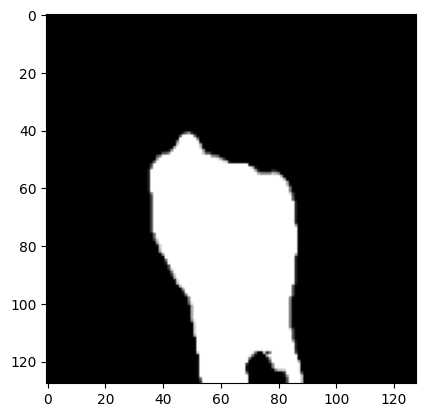

Predicted number of fingers: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


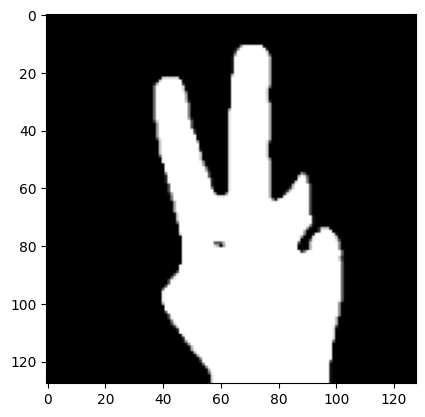

Predicted number of fingers: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


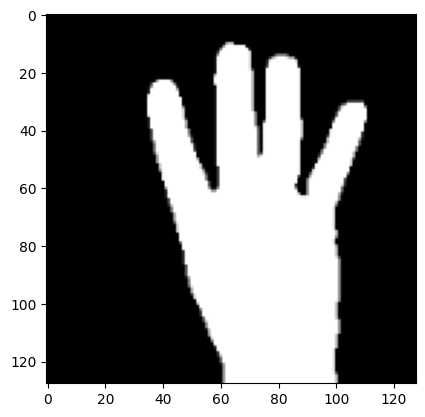

Predicted number of fingers: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


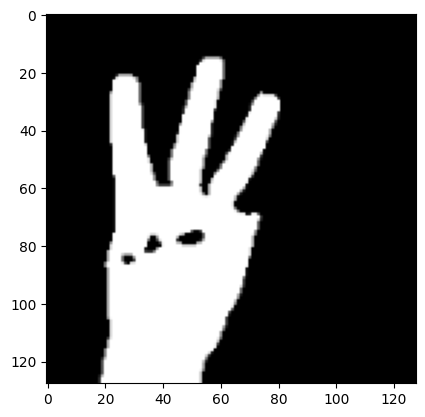

Predicted number of fingers: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


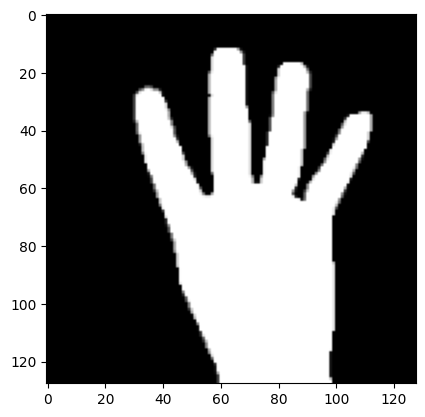

Predicted number of fingers: 4


In [9]:
# Загрузка и предобработка изображения
def load_and_preprocess_image(image_path):
    image = Image.open(image_path).resize(image_size).convert('L')  # Преобразование в градации серого
    image = np.array(image) / 255.0
    image = np.expand_dims(image, axis=-1)  # Добавление канала
    image = np.expand_dims(image, axis=0)  # Добавление батча
    return image

new_model = tf.keras.models.load_model('res/model_8.h5')
image_path = 'res/img/8/'

for i in 1, 2, 3, 4, 5:
    image = load_and_preprocess_image(image_path + str(i) + '.png')
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction)
    plt.imshow(image[0, :, :, 0], cmap='gray')
    plt.show()
    print(f"Predicted number of fingers: {predicted_class}")
